# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Your code here.
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardiness': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,Age,Tardiness
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

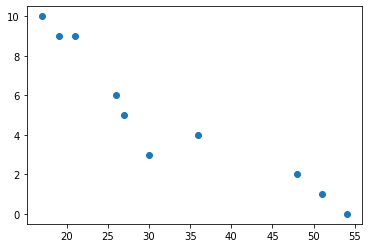

In [9]:
# Your code here.
plt.scatter(student_data["Age"], student_data["Tardiness"])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
''' 
Yes I see a downwards trend that relates the age with the tardiness.
'''

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [32]:
# Your response here.
#correlation:
print(student_data.corr(method='pearson'))
#covariance:
from numpy import cov
covariance = cov(student_data["Age"], student_data["Tardiness"])
print("Covariance Matrix:", covariance)

"""
The pearson correlation describes the direction and the strength of the linear relationship between the variables, on the
other hand the covariance describes only the direction of the linear correlation between the variables.
These values tell me that there is a very strong negative linear relationship between the two variables, which means that
they are highly correlated and move in oposite ways (the bigger the age the lower the tardiness and vice-versa).
"""

                Age  Tardiness
Age        1.000000  -0.939163
Tardiness -0.939163   1.000000
Covariance Matrix: [[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [49]:
# Your response here.
from scipy import stats
results = stats.linregress(student_data["Age"], student_data["Tardiness"])
print(results)
regression_line = results[1] + results[0]*student_data["Age"]

"""
I will use a linear regression for this model due to the previous calculated strength of the linear relationship betwenn
these variables.
"""

LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607)


'\nI will use a linear regression for this model due to the previous calculated strength of the linear relationship betwenn\nthese variables.\n'

Plot your regression model on your scatter plot.

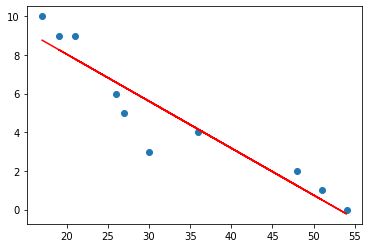

In [50]:
# Your code here.
plt.plot(student_data["Age"], regression_line, color = 'red')
plt.scatter(student_data["Age"], student_data["Tardiness"])
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
"""
In this specific scenario of this class of students we can see that there is a clear linear relationship between age and
tardiness, but there are a lot of other factors that can influence the tardiness that are not necessarily age, and
these other factors can lead us to see, mathematically, that age as a relationship with tardiness when it doesn't. What we
can say for sure is that there is a very strong correlation between the two variables, but not necessarily a relationship of
causality.
So, in conclusion, if this model was applied to millions of people and we had the same results, I would say that age is a
good predictor of tardiness, because we would have a lot of people with different factors afecting their life and a strong
linear relationship in that case would be impossible to overlook, but in the case of this problem we might not be
considering a lot of relevant factors that may affect the tardiness because the sample group is to small.
"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [13]:
# Import any libraries you may need & the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [58]:
# Your response here. 
'''
The most important variable in determining the CO2 emissions is the Fuel Barrels/Year. The least important variable is the
Year.
'''
vehicles.corr()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [75]:
# Your response here. 
results = stats.linregress(vehicles["Fuel Barrels/Year"], vehicles["CO2 Emission Grams/Mile"])
regression_line = results[1] + results[0]*vehicles["Fuel Barrels/Year"]

'''
I'm using a linear regression due to the strength of the linear relationship between these two variables.
'''

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

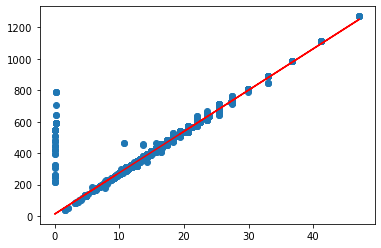

LinregressResult(slope=26.283625397470253, intercept=12.4865208307574, rvalue=0.9861886621428727, pvalue=0.0, stderr=0.02328112378922747)


In [77]:
# Your response here.
plt.scatter(vehicles["Fuel Barrels/Year"], vehicles["CO2 Emission Grams/Mile"])
plt.plot(vehicles["Fuel Barrels/Year"], regression_line, color = 'red')
plt.show()
print(results)
'''
The most important variables in my model are the slope, the intercept and the rvalue. Because the slope and the intercept
give me my regression line, and the rvalue gives me the strength and direction of the linear relationship between these two
variables.
I'm confident that after seeing these results that there is a positive strong linear relationship between the variables,
and a relationship of causality, which makes perfect sense because the more fuel barrels you consume per year, the more CO2
you will emit to the atmosphere.
Of course that there are more factors that influenciate the emissions of CO2 by vehicles but the Fuel Barrels/Year is the
strongest factor.
'''

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [97]:
# Your code here.
data = pd.DataFrame({'People Invited' : [1,3,4,6,8,9,11,14], 'People that did not Attend' : [0,1,0,2,3,2,3,1]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

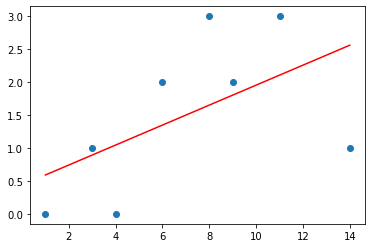

In [98]:
# Your code here.
results = stats.linregress(data['People Invited'], data['People that did not Attend'])
regression_line = results[1] + results[0]*data['People Invited']

plt.scatter(data['People Invited'], data['People that did not Attend'])
plt.plot(data['People Invited'], regression_line, color = 'red')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [99]:
# Your response here. 
print(results)
'''
It tells me that there is a linear relationship between the variables but only moderate.
'''

LinregressResult(slope=0.15151515151515152, intercept=0.43939393939393945, rvalue=0.5504818825631803, pvalue=0.15740634710973236, stderr=0.09380896778286217)


'\nIt tells me that there is a linear relationship between the variables but only moderate.\n'

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

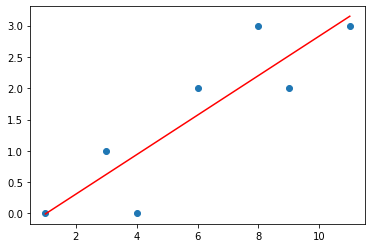

In [100]:
# Your response here. 
data.drop(7, axis= 0, inplace = True) 
results = stats.linregress(data['People Invited'], data['People that did not Attend'])
regression_line = results[1] + results[0]*data['People Invited']

plt.scatter(data['People Invited'], data['People that did not Attend'])
plt.plot(data['People Invited'], regression_line, color = 'red')
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [101]:
# Your response here. 
print(results)
'''
Without the linear relationship between the two variables without the outlier is much stronger, which means that we can
create a regression line that fits the values much better, and therefore our model will be better.
'''

LinregressResult(slope=0.31578947368421056, intercept=-0.3233082706766919, rvalue=0.883281245421826, pvalue=0.008386776041362703, stderr=0.0749620666503129)
